###### Anastasiia Khaburska

### Homework 3
# Task 1.4

Use MeanShift to cluster the data from here:
https://cs.joensuu.fi/sipu/datasets/

Use G2 sets and S sets. Compare the data with ground truth.

Here you can see MeanShift algorithm results for S1,S2,S3,S4, G2-2-30, G2-2-50 datasets

In general the MeanShift algorithm realized by sclearn worked comperatively good. On S datasets I divided the values of datapoints by 1000, to easily visualize them and estimate the bandwidth.



In [1]:
from itertools import permutations
import numpy as np
import sklearn
import sklearn.decomposition as dec
import sklearn.cluster as clu
import sklearn.datasets as ds
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)

In [2]:
def load_data(dots_path, labels_path, divide=1 ):
    """
    Loads a dataset from a text file dots_path. It expects the data to be 2-dimensional and have a format like so:
    12345   98765\n
    56789   01234\n
    
    Loads a labels from a text file labels_path:
    0\n
    1\n
    ...
    There can be an arbitrary number of spaces between the two numbers in a line and a new line at the end of each line.
    """
    dim = len(open(dots_path).readline().split())
    dots = np.array(open(dots_path).read().split(), dtype='float')
    dots = dots.reshape(int(dots.size/dim), dim)
    labels = np.array(open(labels_path).read().split(), dtype='float')
    D=dots/divide
    x,y=D.T
    return D, x,y,labels

In [3]:
D,x,y,labels=load_data('./data/s1.txt','./labels/s1-label.txt',1000 )
D

array([[664.159, 550.946],
       [665.845, 557.965],
       [597.173, 575.538],
       ...,
       [650.661, 861.267],
       [599.647, 858.702],
       [684.091, 842.566]])

In [4]:
ms = clu.MeanShift().fit(D)
print('Number of clusters in S3 if the bandwidth is estimated using clu.estimate_bandwidth:')
print(len(set(ms.labels_)))
df = pd.DataFrame(dict(x=x, y=y, label=ms.labels_))
groups = df.groupby('label')

ms_150 = clu.MeanShift(bandwidth=150).fit(D)
print('Number of clusters in S3 if the bandwidth=150:')
print(len(set(ms_150.labels_)))
df_150 = pd.DataFrame(dict(x=x, y=y, label=ms_150.labels_))
groups_150 = df_150.groupby('label')

ms_100 = clu.MeanShift(bandwidth=100).fit(D)
print('Number of clusters in S3 if the bandwidth=100:')
print(len(set(ms_100.labels_)))
df_100 = pd.DataFrame(dict(x=x, y=y, label=ms_100.labels_))
groups_100 = df_100.groupby('label')

ms_70 = clu.MeanShift(bandwidth=70).fit(D)
print('Number of clusters in S3 if the bandwidth=70:')
print(len(set(ms_70.labels_)))
df_70 = pd.DataFrame(dict(x=x, y=y, label=ms_70.labels_))
groups_70 = df_70.groupby('label')

Number of clusters in S3 if the bandwidth is estimated using clu.estimate_bandwidth:
1
Number of clusters in S3 if the bandwidth=150:
9
Number of clusters in S3 if the bandwidth=100:
15
Number of clusters in S3 if the bandwidth=70:
15


''

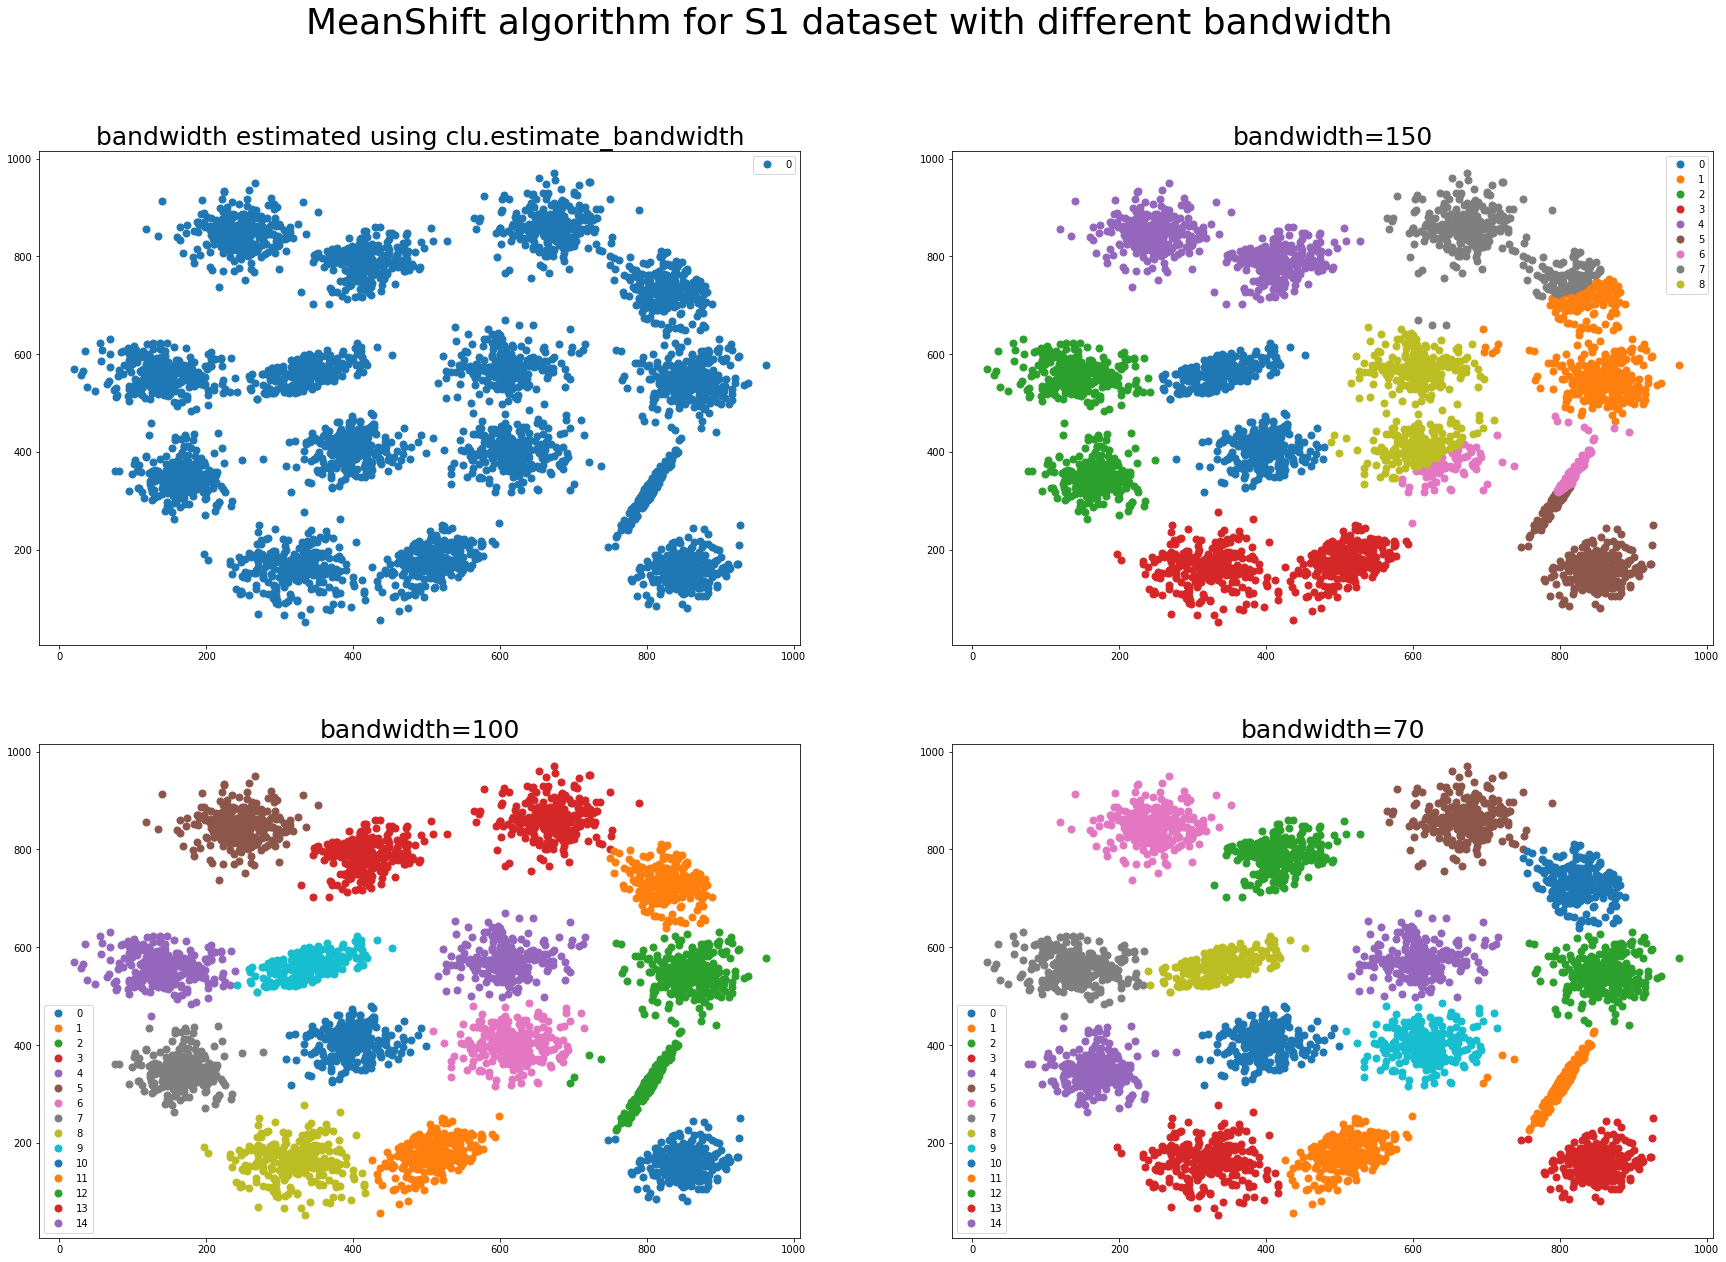

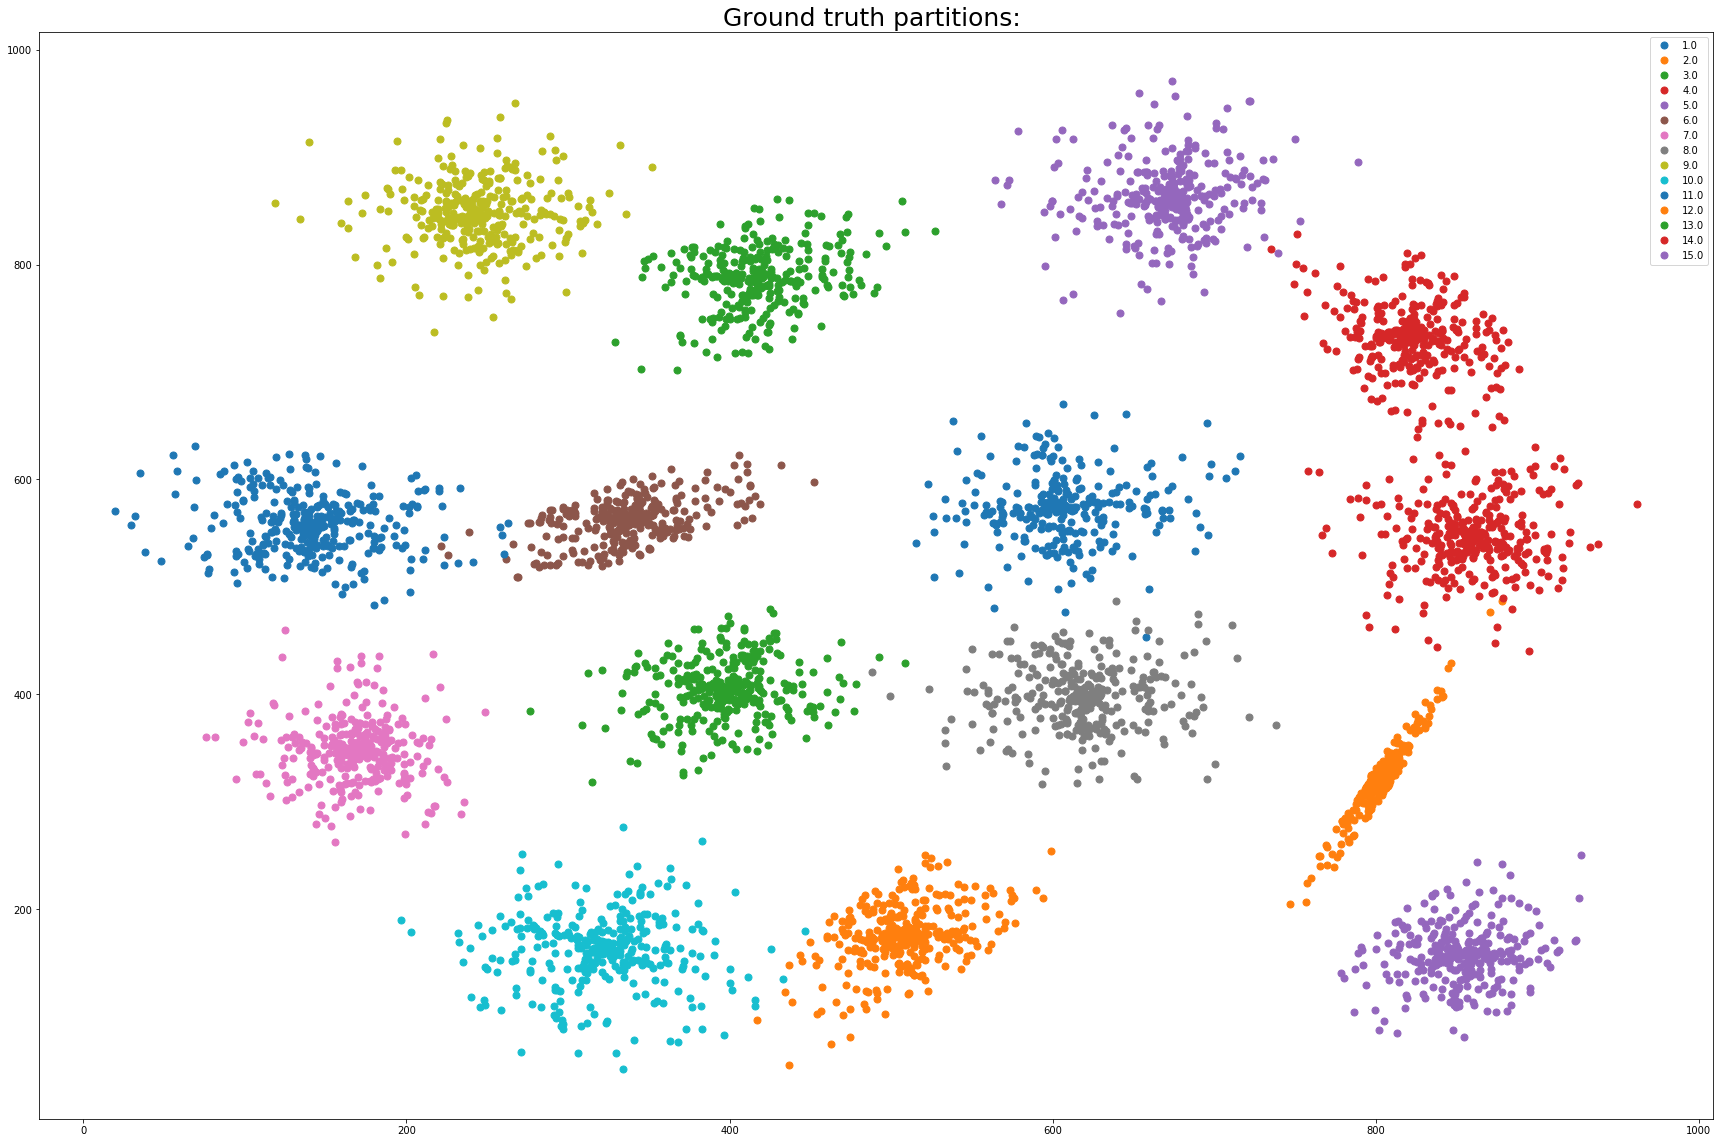

In [5]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
fig, ax = plt.subplots(2,2)
for name, group in groups:
    ax[0,0].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[0,0].legend()
ax[0,0].set_title('bandwidth estimated using clu.estimate_bandwidth', fontsize=25)
for name, group in groups_150:
    ax[0,1].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[0,1].legend()
ax[0,1].set_title('bandwidth=150', fontsize=25)
for name, group in groups_100:
    ax[1,0].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[1,0].legend()
ax[1,0].set_title('bandwidth=100', fontsize=25)
for name, group in groups_70:
    ax[1,1].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[1,1].set_title('bandwidth=70', fontsize=25)
ax[1,1].legend()
fig.suptitle('MeanShift algorithm for S1 dataset with different bandwidth', fontsize=36)

df_gold = pd.DataFrame(dict(x=x, y=y, label=labels))
groups_gold= df_gold.groupby('label')
fig, ax = plt.subplots()
for name, group in groups_gold:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax.legend()
ax.set_title('Ground truth partitions: ', fontsize=25)
''


In [6]:
D,x,y,labels=load_data('./data/s2.txt','./labels/s2-label.txt',1000 )

In [7]:
ms = clu.MeanShift().fit(D)
print('Number of clusters in S3 if the bandwidth is estimated using clu.estimate_bandwidth:')
print(len(set(ms.labels_)))
df = pd.DataFrame(dict(x=x, y=y, label=ms.labels_))
groups = df.groupby('label')

ms_150 = clu.MeanShift(bandwidth=150).fit(D)
print('Number of clusters in S3 if the bandwidth=150:')
print(len(set(ms_150.labels_)))
df_150 = pd.DataFrame(dict(x=x, y=y, label=ms_150.labels_))
groups_150 = df_150.groupby('label')

ms_100 = clu.MeanShift(bandwidth=100).fit(D)
print('Number of clusters in S3 if the bandwidth=100:')
print(len(set(ms_100.labels_)))
df_100 = pd.DataFrame(dict(x=x, y=y, label=ms_100.labels_))
groups_100 = df_100.groupby('label')

ms_70 = clu.MeanShift(bandwidth=70).fit(D)
print('Number of clusters in S3 if the bandwidth=70:')
print(len(set(ms_70.labels_)))
df_70 = pd.DataFrame(dict(x=x, y=y, label=ms_70.labels_))
groups_70 = df_70.groupby('label')

Number of clusters in S3 if the bandwidth is estimated using clu.estimate_bandwidth:
2
Number of clusters in S3 if the bandwidth=150:
9
Number of clusters in S3 if the bandwidth=100:
14
Number of clusters in S3 if the bandwidth=70:
16


''

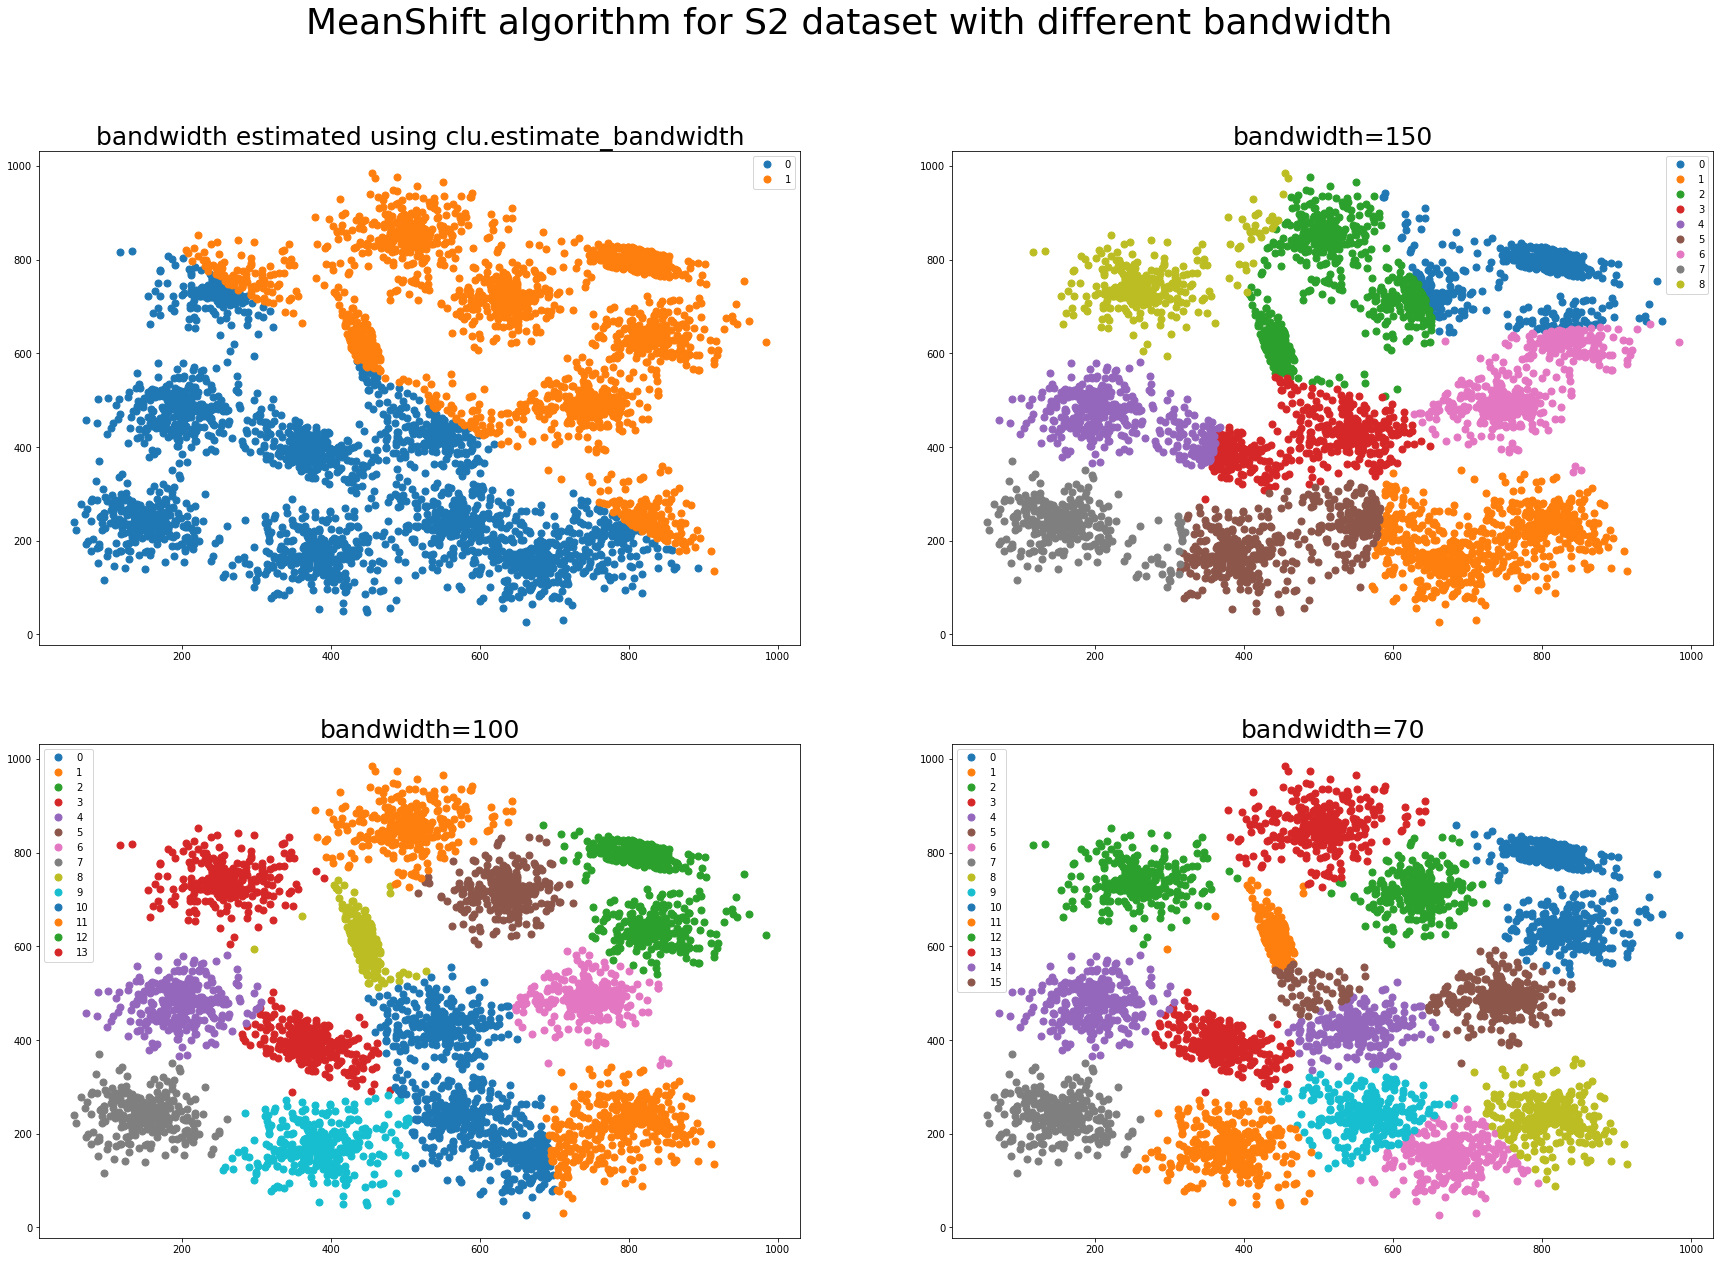

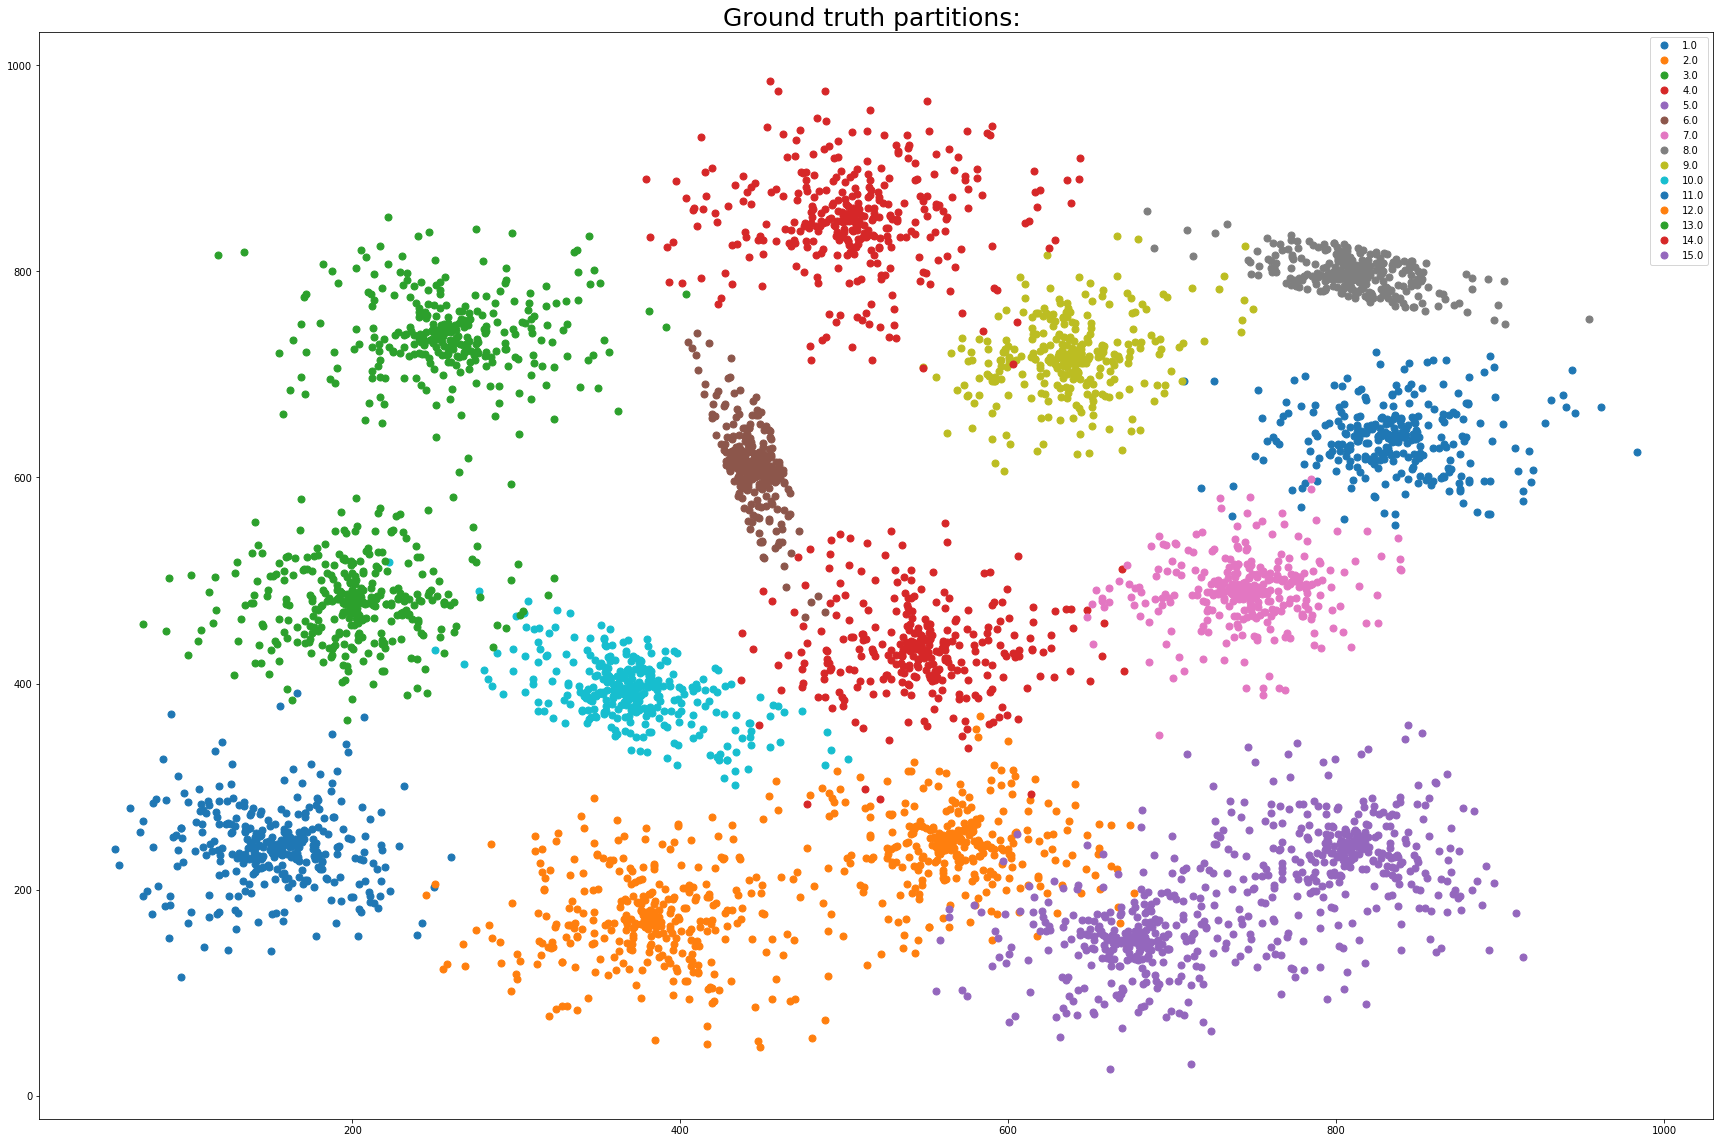

In [8]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
fig, ax = plt.subplots(2,2)
for name, group in groups:
    ax[0,0].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[0,0].legend()
ax[0,0].set_title('bandwidth estimated using clu.estimate_bandwidth', fontsize=25)
for name, group in groups_150:
    ax[0,1].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[0,1].legend()
ax[0,1].set_title('bandwidth=150', fontsize=25)
for name, group in groups_100:
    ax[1,0].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[1,0].legend()
ax[1,0].set_title('bandwidth=100', fontsize=25)
for name, group in groups_70:
    ax[1,1].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[1,1].set_title('bandwidth=70', fontsize=25)
ax[1,1].legend()
fig.suptitle('MeanShift algorithm for S2 dataset with different bandwidth', fontsize=36)

df_gold = pd.DataFrame(dict(x=x, y=y, label=labels))
groups_gold= df_gold.groupby('label')
fig, ax = plt.subplots()
for name, group in groups_gold:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax.legend()
ax.set_title('Ground truth partitions: ', fontsize=25)
''


In [9]:
D,x,y,labels=load_data('./data/s4.txt','./labels/s4-label.txt',1000 )

In [10]:
ms = clu.MeanShift().fit(D)
print('Number of clusters in S3 if the bandwidth is estimated using clu.estimate_bandwidth:')
print(len(set(ms.labels_)))
df = pd.DataFrame(dict(x=x, y=y, label=ms.labels_))
groups = df.groupby('label')

ms_150 = clu.MeanShift(bandwidth=150).fit(D)
print('Number of clusters in S3 if the bandwidth=150:')
print(len(set(ms_150.labels_)))
df_150 = pd.DataFrame(dict(x=x, y=y, label=ms_150.labels_))
groups_150 = df_150.groupby('label')

ms_100 = clu.MeanShift(bandwidth=100).fit(D)
print('Number of clusters in S3 if the bandwidth=100:')
print(len(set(ms_100.labels_)))
df_100 = pd.DataFrame(dict(x=x, y=y, label=ms_100.labels_))
groups_100 = df_100.groupby('label')

ms_70 = clu.MeanShift(bandwidth=70).fit(D)
print('Number of clusters in S3 if the bandwidth=70:')
print(len(set(ms_70.labels_)))
df_70 = pd.DataFrame(dict(x=x, y=y, label=ms_70.labels_))
groups_70 = df_70.groupby('label')

Number of clusters in S3 if the bandwidth is estimated using clu.estimate_bandwidth:
1
Number of clusters in S3 if the bandwidth=150:
5
Number of clusters in S3 if the bandwidth=100:
12
Number of clusters in S3 if the bandwidth=70:
20


''

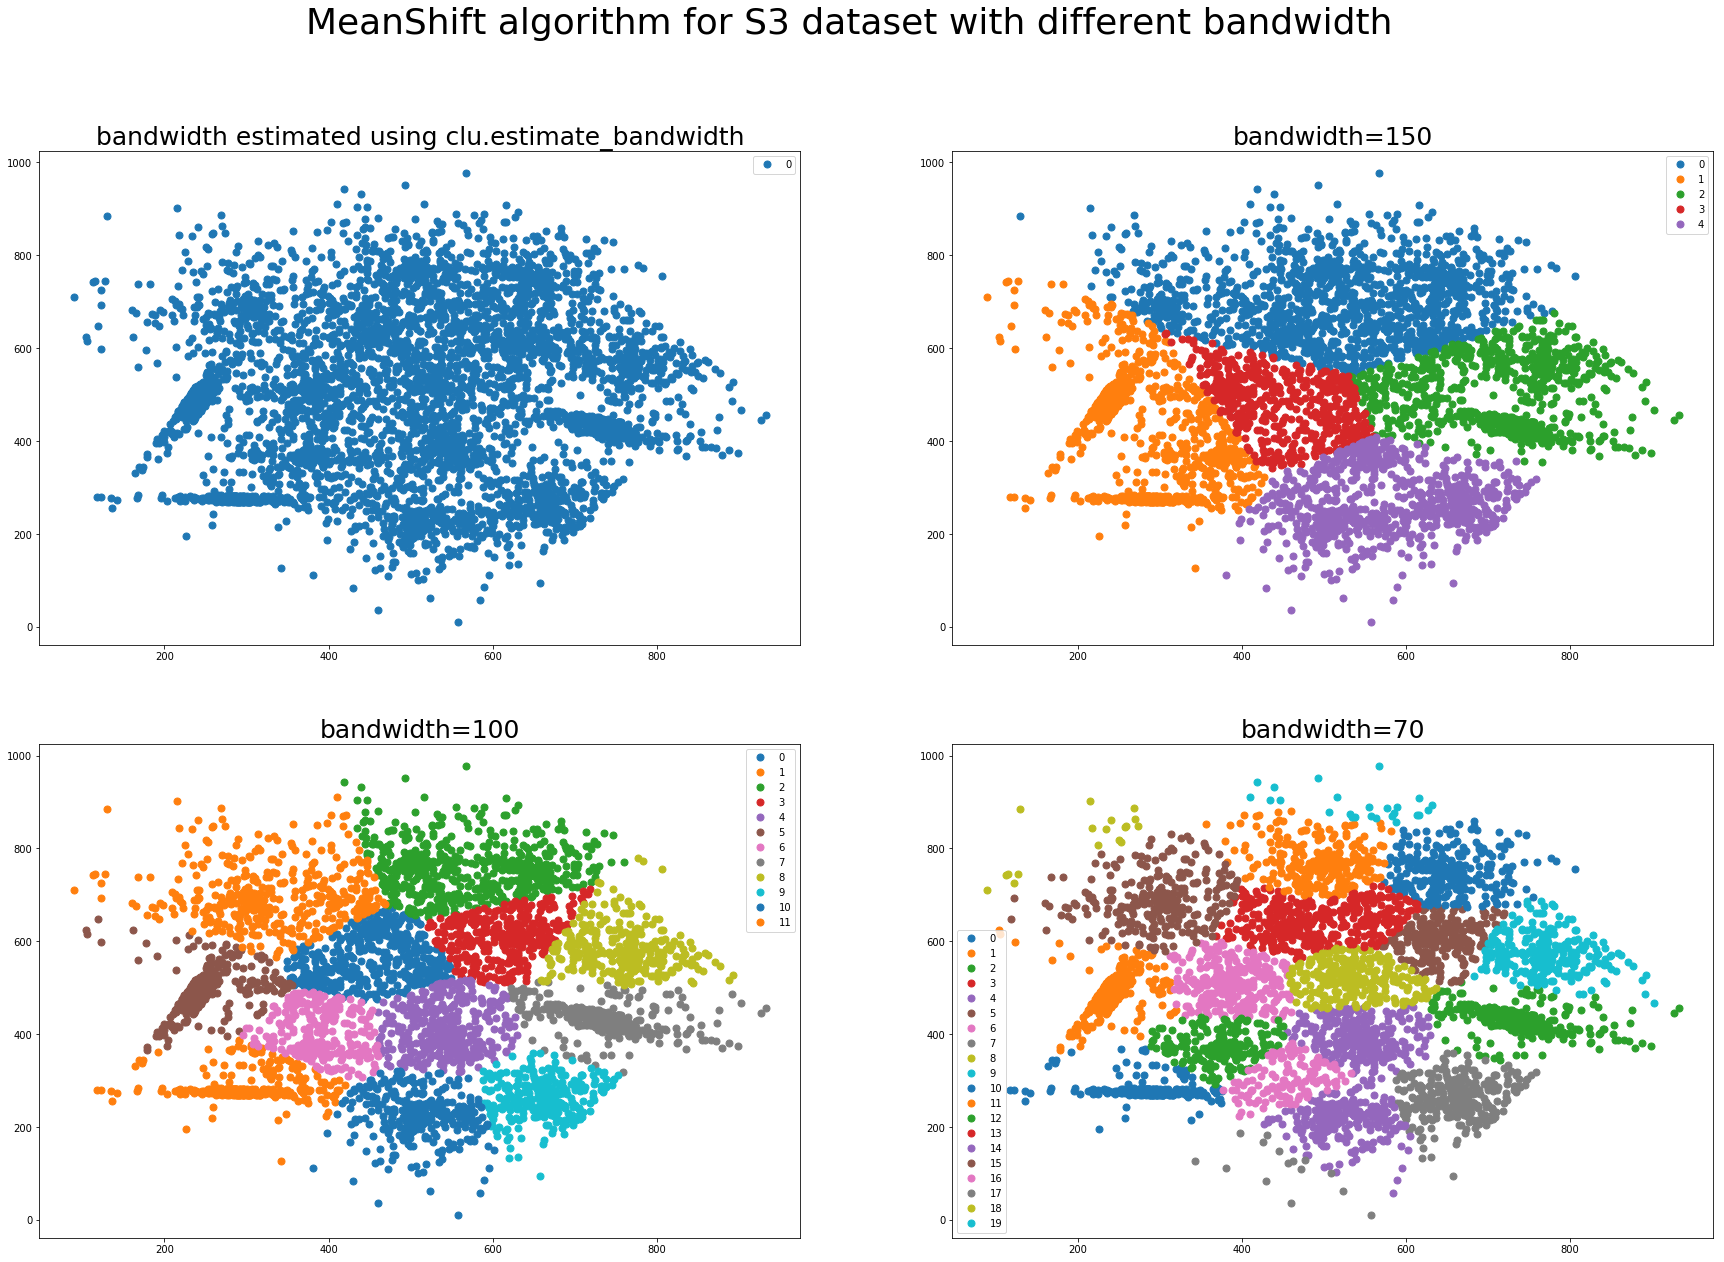

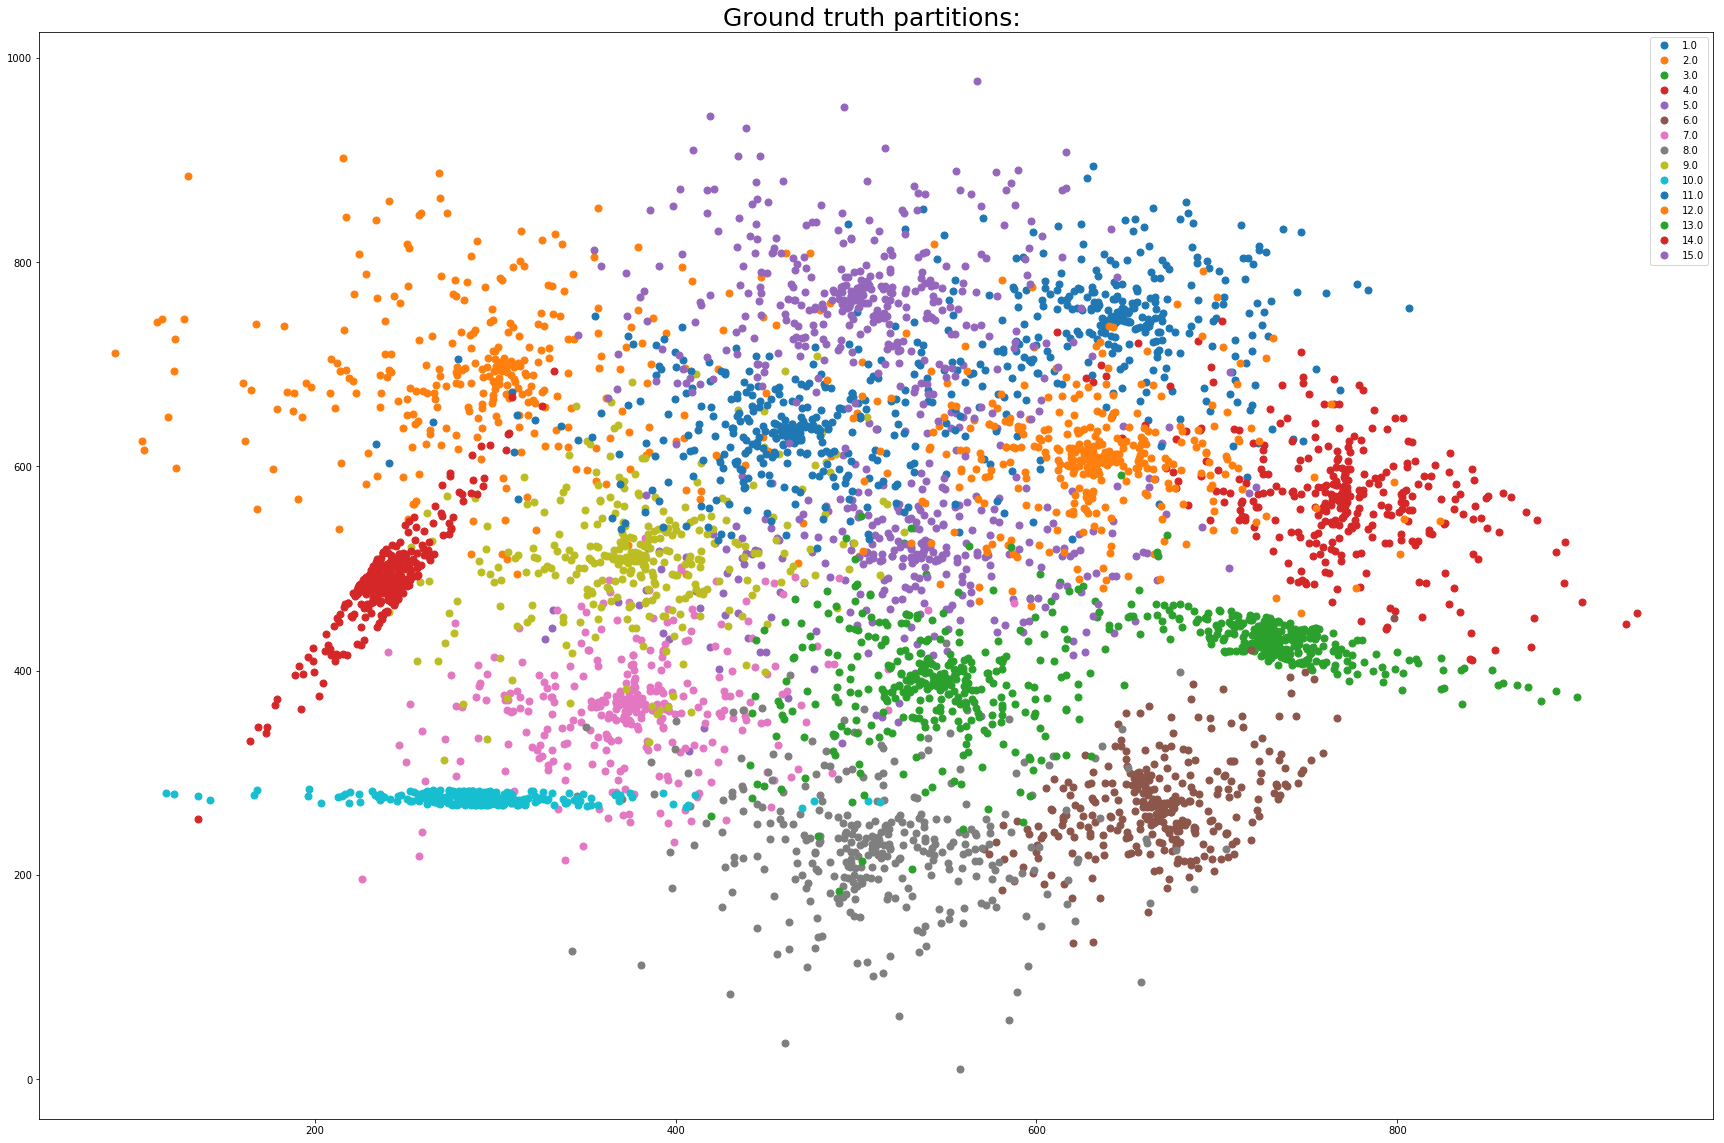

In [12]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
fig, ax = plt.subplots(2,2)
for name, group in groups:
    ax[0,0].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[0,0].legend()
ax[0,0].set_title('bandwidth estimated using clu.estimate_bandwidth', fontsize=25)
for name, group in groups_150:
    ax[0,1].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[0,1].legend()
ax[0,1].set_title('bandwidth=150', fontsize=25)
for name, group in groups_100:
    ax[1,0].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[1,0].legend()
ax[1,0].set_title('bandwidth=100', fontsize=25)
for name, group in groups_70:
    ax[1,1].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[1,1].set_title('bandwidth=70', fontsize=25)
ax[1,1].legend()
fig.suptitle('MeanShift algorithm for S3 dataset with different bandwidth', fontsize=36)

df_gold = pd.DataFrame(dict(x=x, y=y, label=labels))
groups_gold= df_gold.groupby('label')
fig, ax = plt.subplots()
for name, group in groups_gold:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax.legend()
ax.set_title('Ground truth partitions: ', fontsize=25)
''


In [13]:
D,x,y,labels=load_data('./data/s3.txt','./labels/s3-label.txt',1000 )

In [14]:
ms = clu.MeanShift().fit(D)
print('Number of clusters in S3 if the bandwidth is estimated using clu.estimate_bandwidth:')
print(len(set(ms.labels_)))
df = pd.DataFrame(dict(x=x, y=y, label=ms.labels_))
groups = df.groupby('label')

ms_150 = clu.MeanShift(bandwidth=150).fit(D)
print('Number of clusters in S3 if the bandwidth=150:')
print(len(set(ms_150.labels_)))
df_150 = pd.DataFrame(dict(x=x, y=y, label=ms_150.labels_))
groups_150 = df_150.groupby('label')

ms_100 = clu.MeanShift(bandwidth=100).fit(D)
print('Number of clusters in S3 if the bandwidth=100:')
print(len(set(ms_100.labels_)))
df_100 = pd.DataFrame(dict(x=x, y=y, label=ms_100.labels_))
groups_100 = df_100.groupby('label')

ms_70 = clu.MeanShift(bandwidth=70).fit(D)
print('Number of clusters in S3 if the bandwidth=70:')
print(len(set(ms_70.labels_)))
df_70 = pd.DataFrame(dict(x=x, y=y, label=ms_70.labels_))
groups_70 = df_70.groupby('label')

Number of clusters in S3 if the bandwidth is estimated using clu.estimate_bandwidth:
2
Number of clusters in S3 if the bandwidth=150:
5
Number of clusters in S3 if the bandwidth=100:
11
Number of clusters in S3 if the bandwidth=70:
19


''

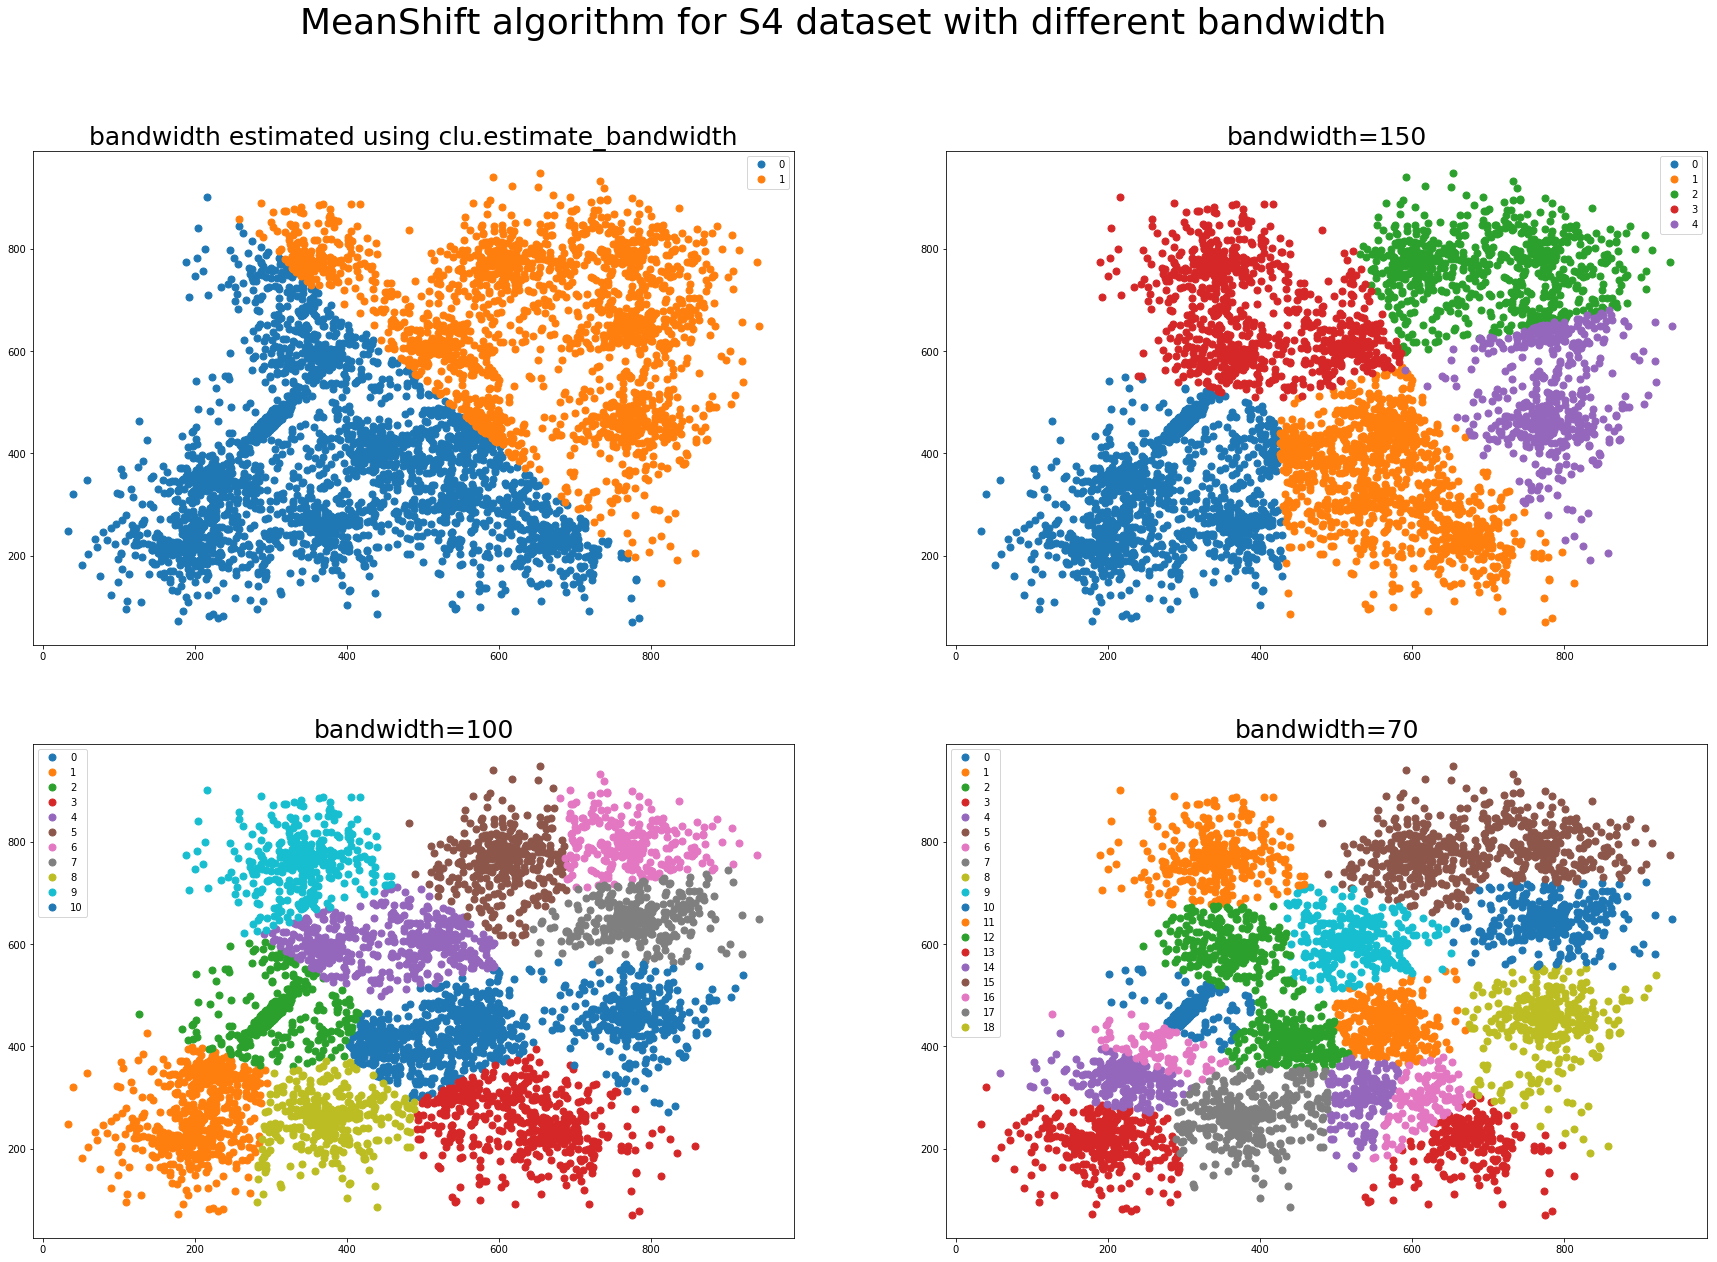

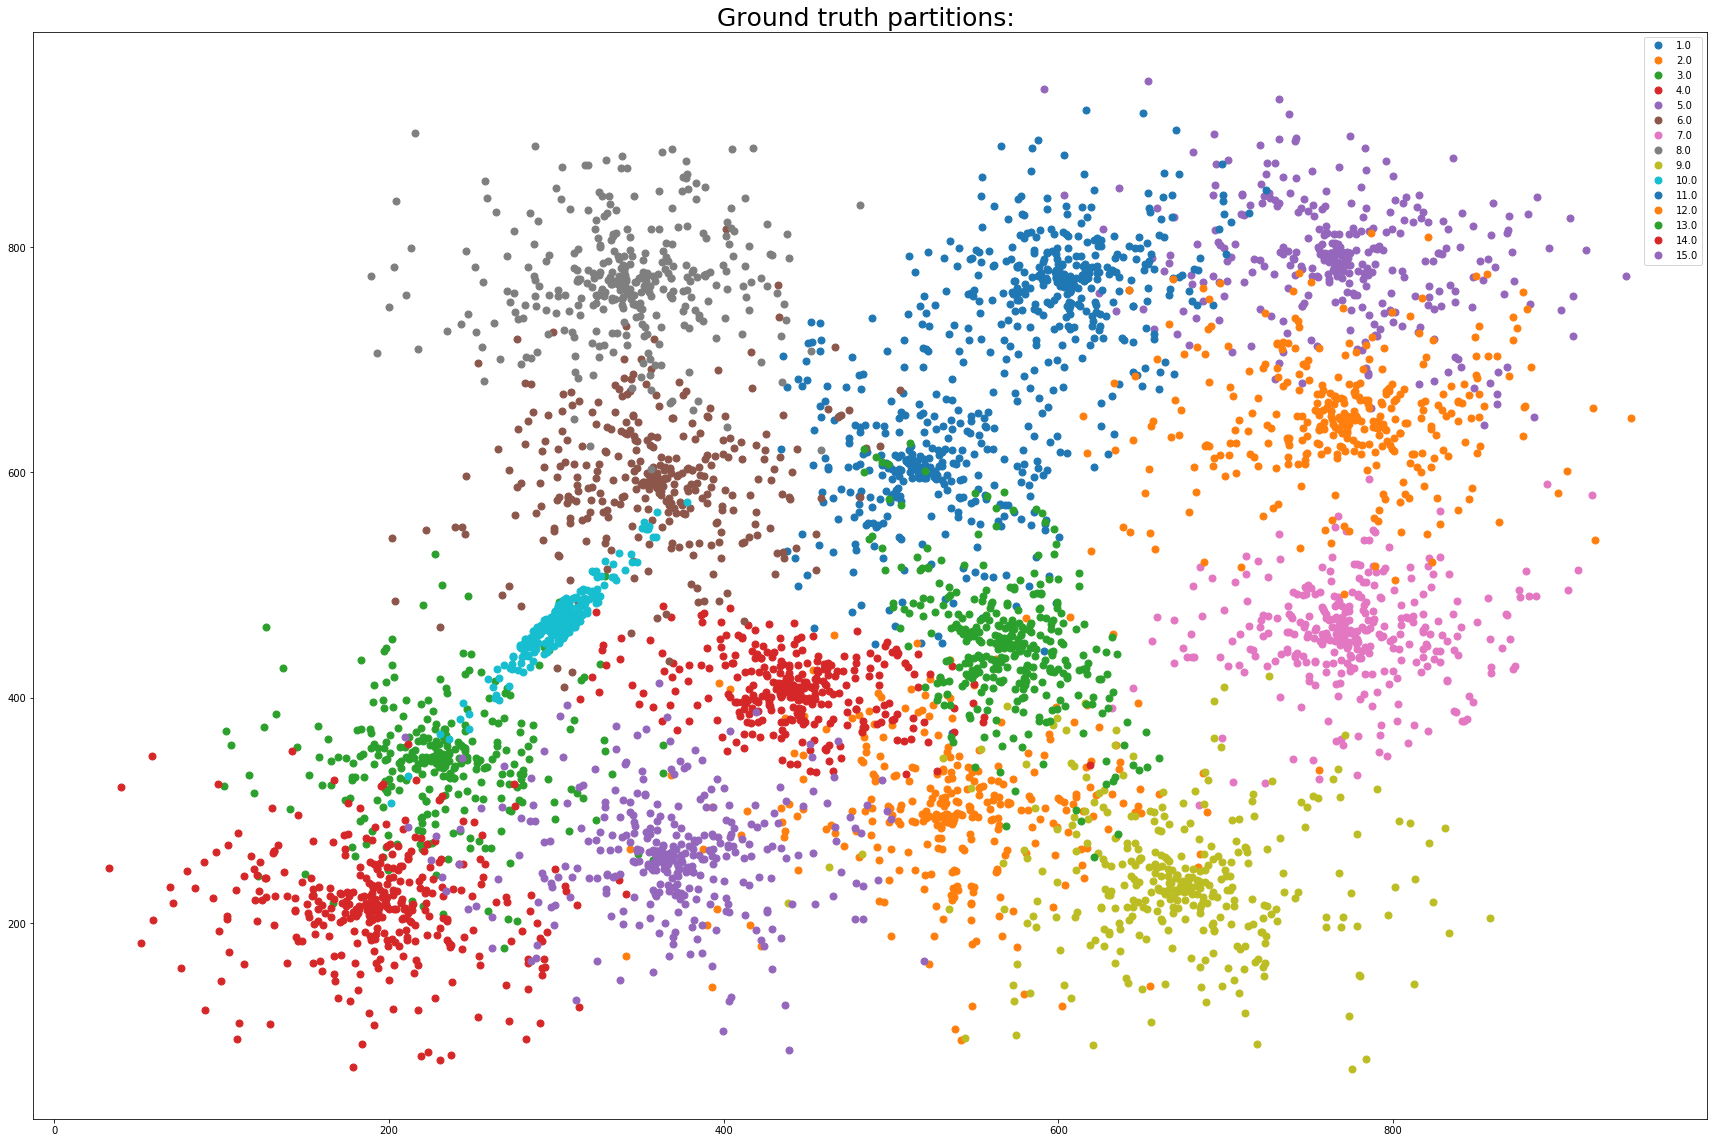

In [15]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
fig, ax = plt.subplots(2,2)
for name, group in groups:
    ax[0,0].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[0,0].legend()
ax[0,0].set_title('bandwidth estimated using clu.estimate_bandwidth', fontsize=25)
for name, group in groups_150:
    ax[0,1].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[0,1].legend()
ax[0,1].set_title('bandwidth=150', fontsize=25)
for name, group in groups_100:
    ax[1,0].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[1,0].legend()
ax[1,0].set_title('bandwidth=100', fontsize=25)
for name, group in groups_70:
    ax[1,1].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[1,1].set_title('bandwidth=70', fontsize=25)
ax[1,1].legend()
fig.suptitle('MeanShift algorithm for S4 dataset with different bandwidth', fontsize=36)

df_gold = pd.DataFrame(dict(x=x, y=y, label=labels))
groups_gold= df_gold.groupby('label')
fig, ax = plt.subplots()
for name, group in groups_gold:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax.legend()
ax.set_title('Ground truth partitions: ', fontsize=25)
''


In [28]:
D,x,y,labels=load_data('./G2-data/g2-2-30.txt','./G2-labels/g2-2-30-gt.txt',1 )
D

array([[500., 537.],
       [522., 507.],
       [438., 567.],
       ...,
       [633., 575.],
       [610., 602.],
       [589., 600.]])

In [29]:
ms = clu.MeanShift().fit(D)
print('Number of clusters in G2-2-30 if the bandwidth is estimated using clu.estimate_bandwidth:')
print(len(set(ms.labels_)))
df = pd.DataFrame(dict(x=x, y=y, label=ms.labels_))
groups = df.groupby('label')

ms_70 = clu.MeanShift(bandwidth=70).fit(D)
print('Number of clusters in G2-2-30 if the bandwidth=70:')
print(len(set(ms_70.labels_)))
df_70 = pd.DataFrame(dict(x=x, y=y, label=ms_70.labels_))
groups_70 = df_70.groupby('label')

Number of clusters in S3 if the bandwidth is estimated using clu.estimate_bandwidth:
2
Number of clusters in S3 if the bandwidth=70:
2


''

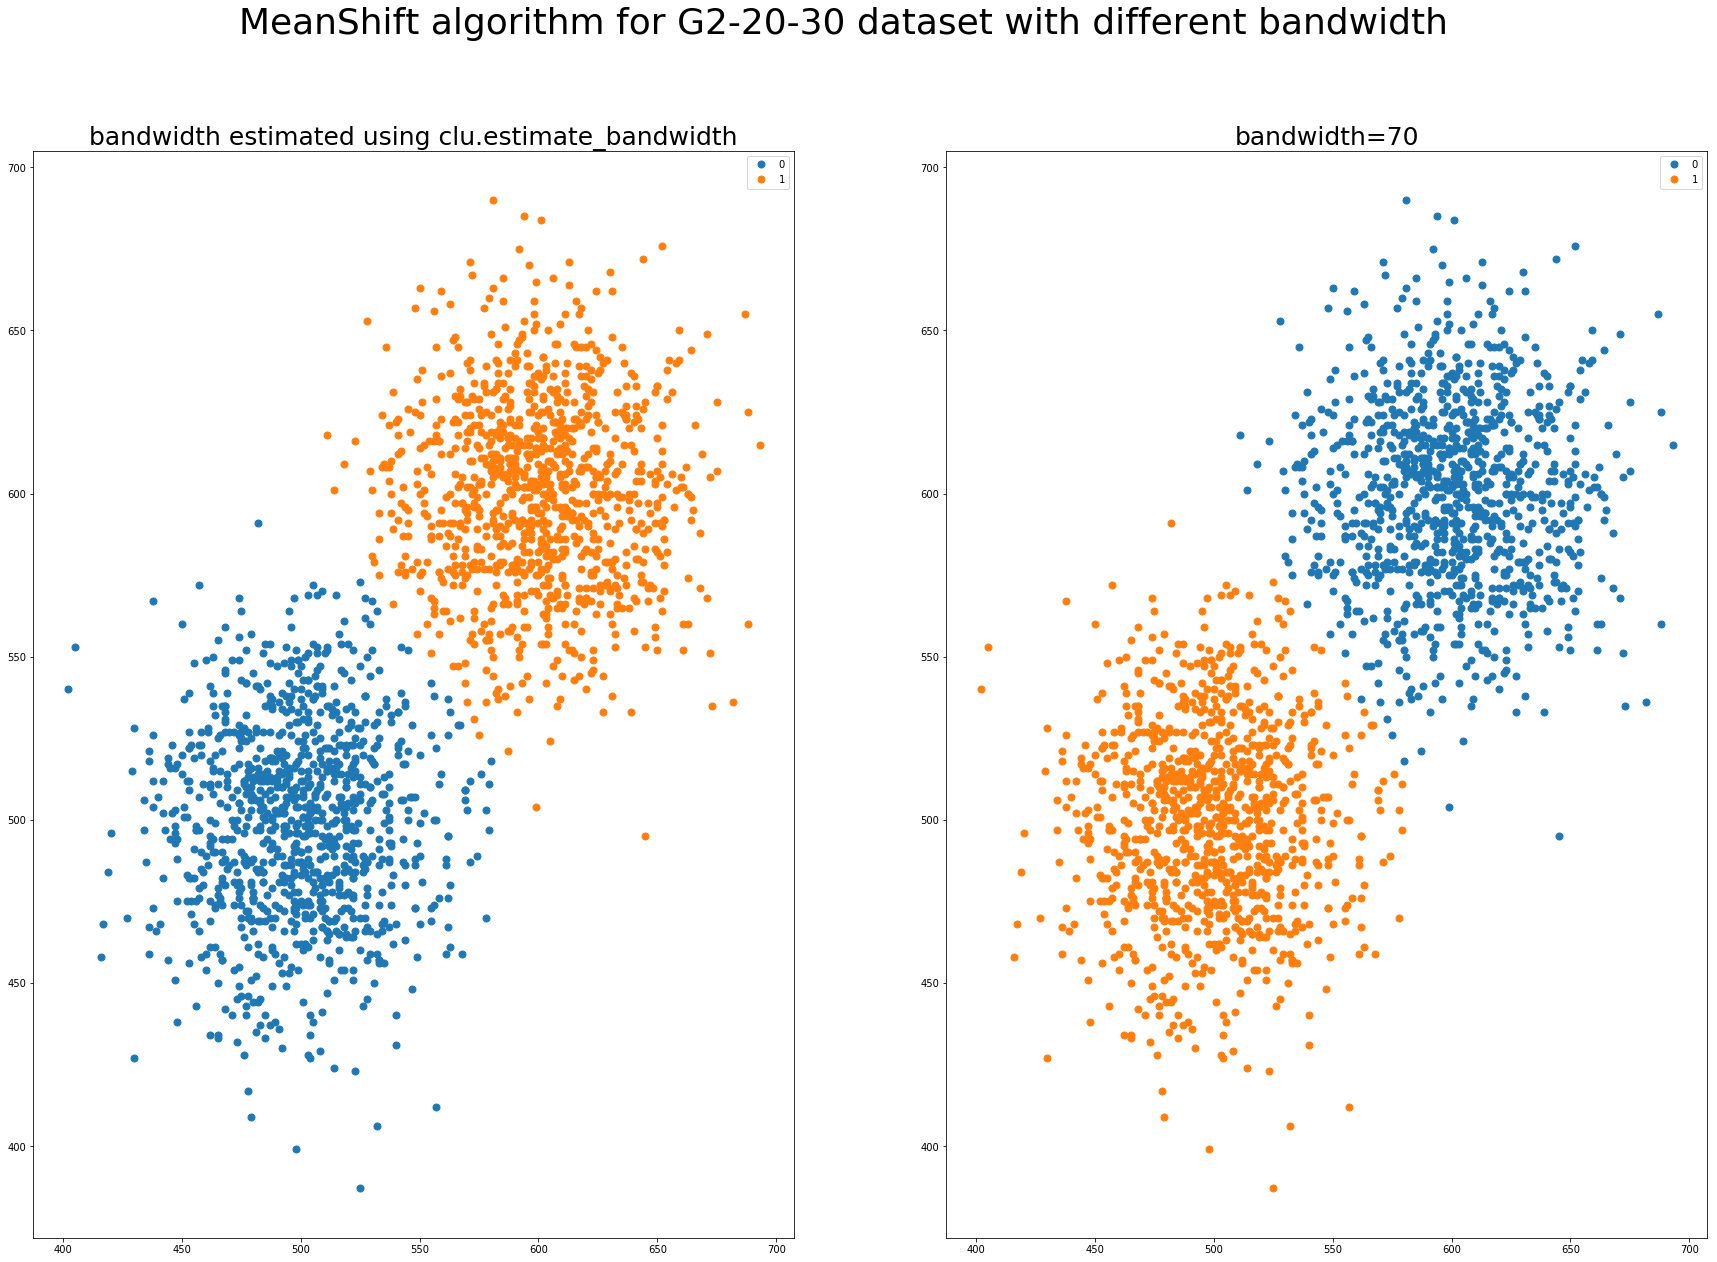

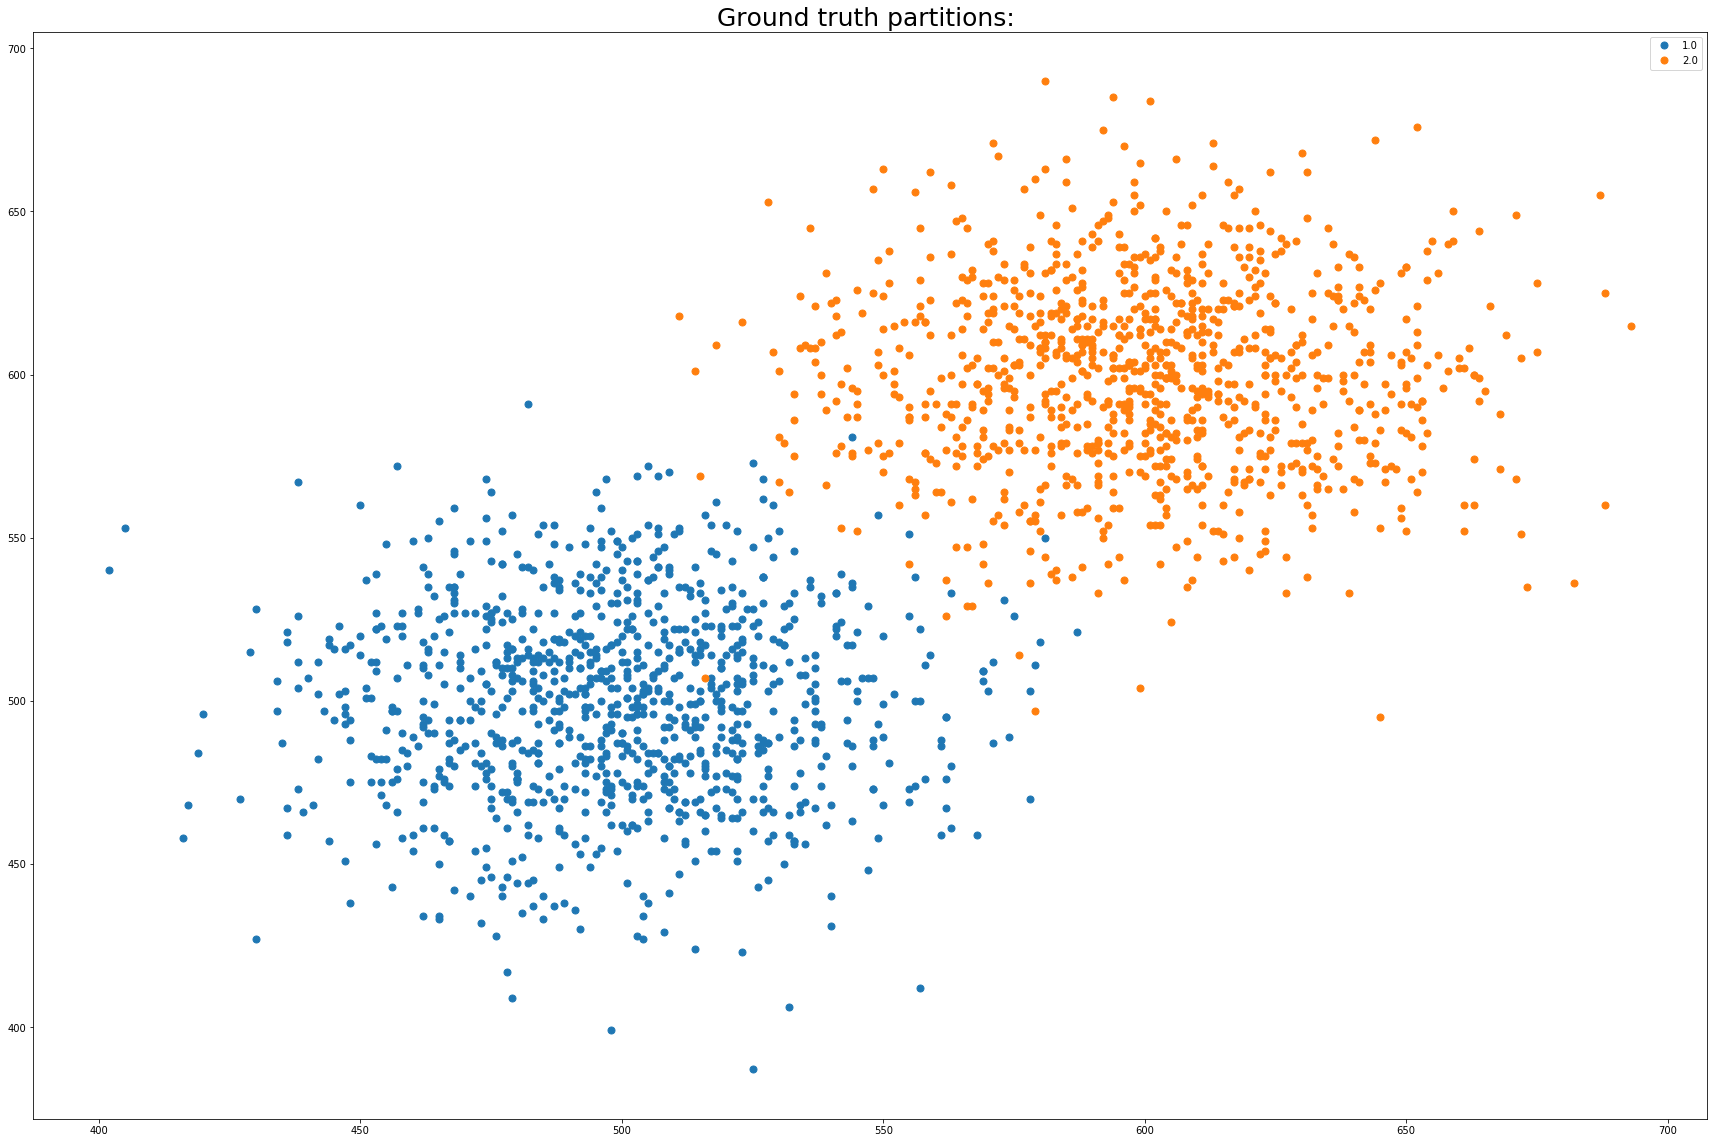

In [32]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
fig, ax = plt.subplots(1,2)
for name, group in groups:
    ax[0].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[0].legend()
ax[0].set_title('bandwidth estimated using clu.estimate_bandwidth', fontsize=25)

for name, group in groups_70:
    ax[1].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[1].legend()
ax[1].set_title('bandwidth=70', fontsize=25)

fig.suptitle('MeanShift algorithm for G2-20-30 dataset with different bandwidth', fontsize=36)

df_gold = pd.DataFrame(dict(x=x, y=y, label=labels))
groups_gold= df_gold.groupby('label')
fig, ax = plt.subplots()
for name, group in groups_gold:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax.legend()
ax.set_title('Ground truth partitions: ', fontsize=25)
''


In [34]:
D,x,y,labels=load_data('./G2-data/g2-2-50.txt','./G2-labels/g2-2-50-gt.txt',1 )
D

array([[543., 413.],
       [582., 552.],
       [526., 518.],
       ...,
       [488., 553.],
       [692., 631.],
       [633., 608.]])

In [35]:
ms = clu.MeanShift().fit(D)
print('Number of clusters in G2-2-50 if the bandwidth is estimated using clu.estimate_bandwidth:')
print(len(set(ms.labels_)))
df = pd.DataFrame(dict(x=x, y=y, label=ms.labels_))
groups = df.groupby('label')

ms_70 = clu.MeanShift(bandwidth=70).fit(D)
print('Number of clusters in G2-2-50 if the bandwidth=70:')
print(len(set(ms_70.labels_)))
df_70 = pd.DataFrame(dict(x=x, y=y, label=ms_70.labels_))
groups_70 = df_70.groupby('label')

Number of clusters in G2-2-50 if the bandwidth is estimated using clu.estimate_bandwidth:
1
Number of clusters in G2-2-50 if the bandwidth=70:
2


''

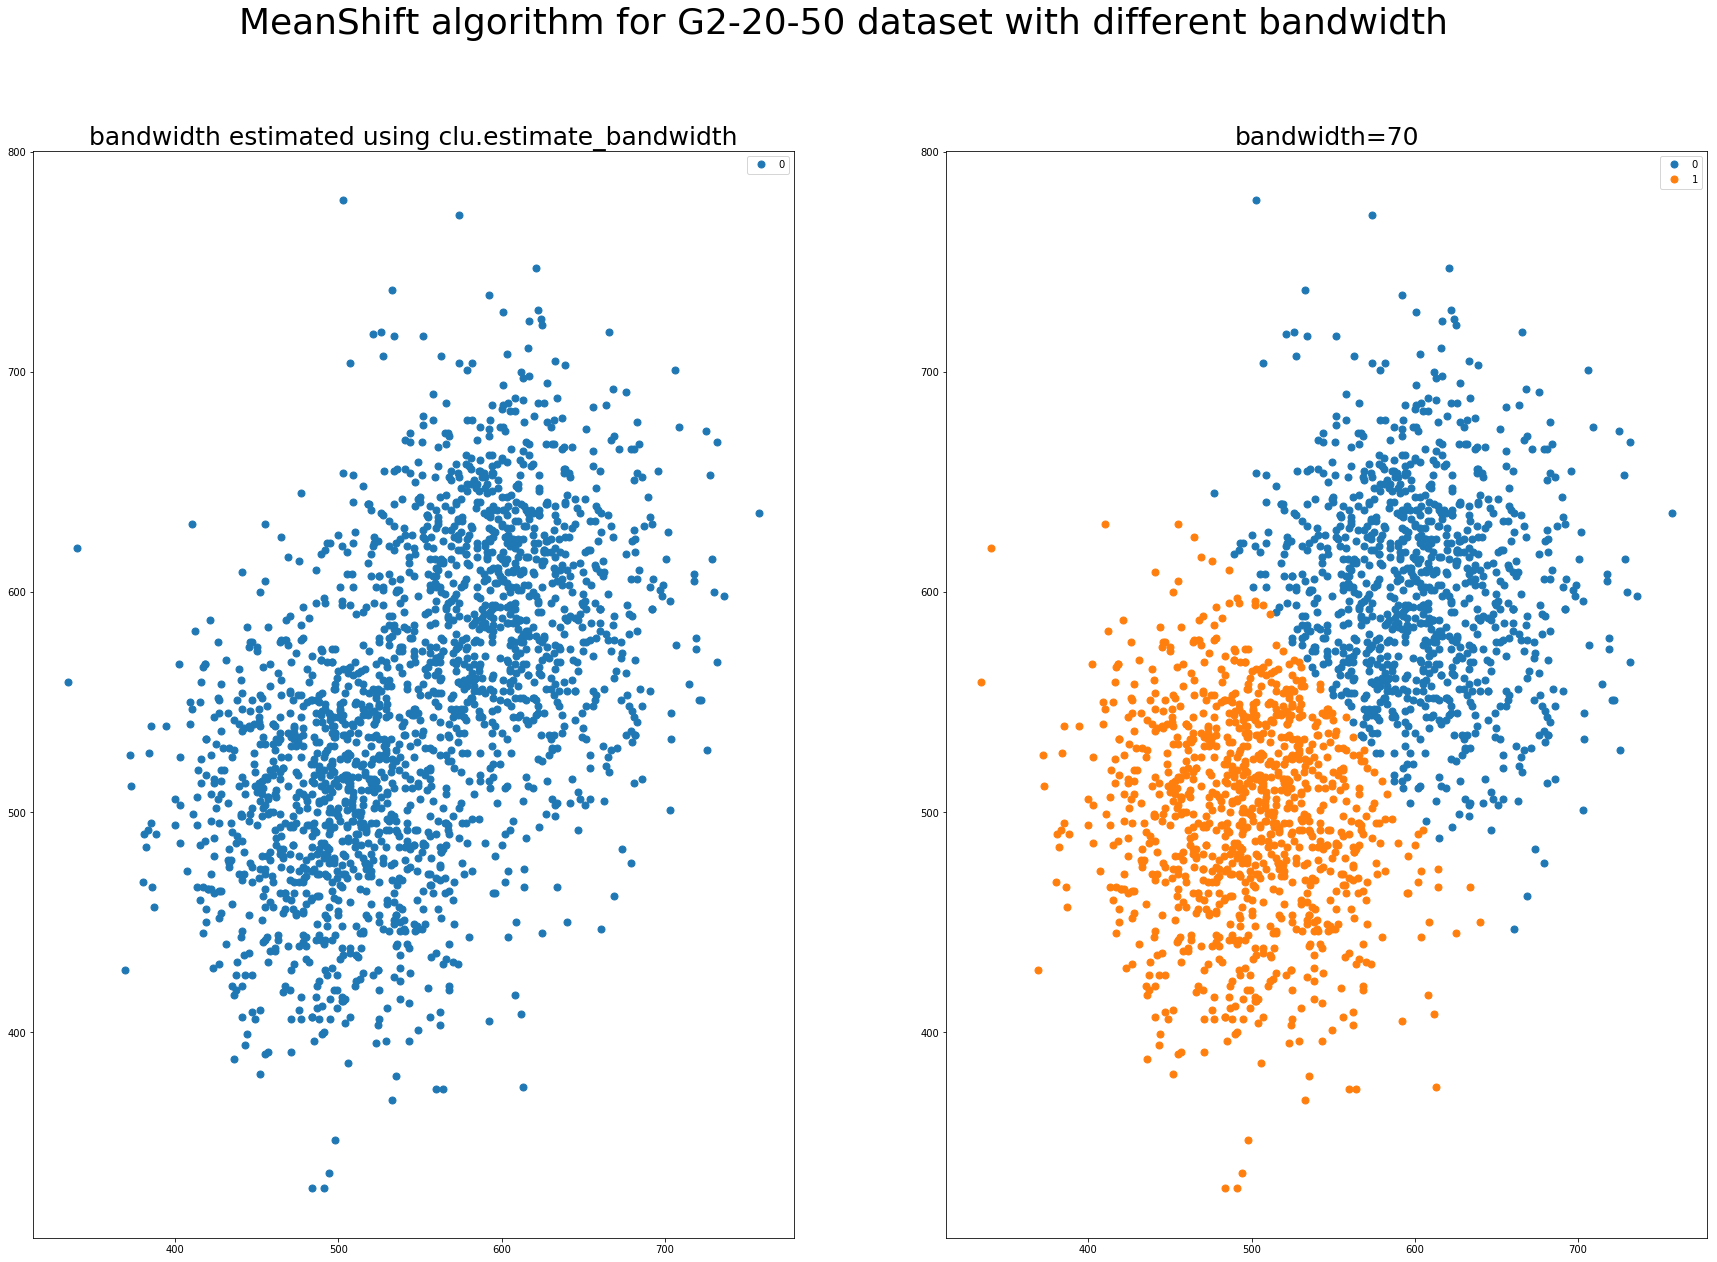

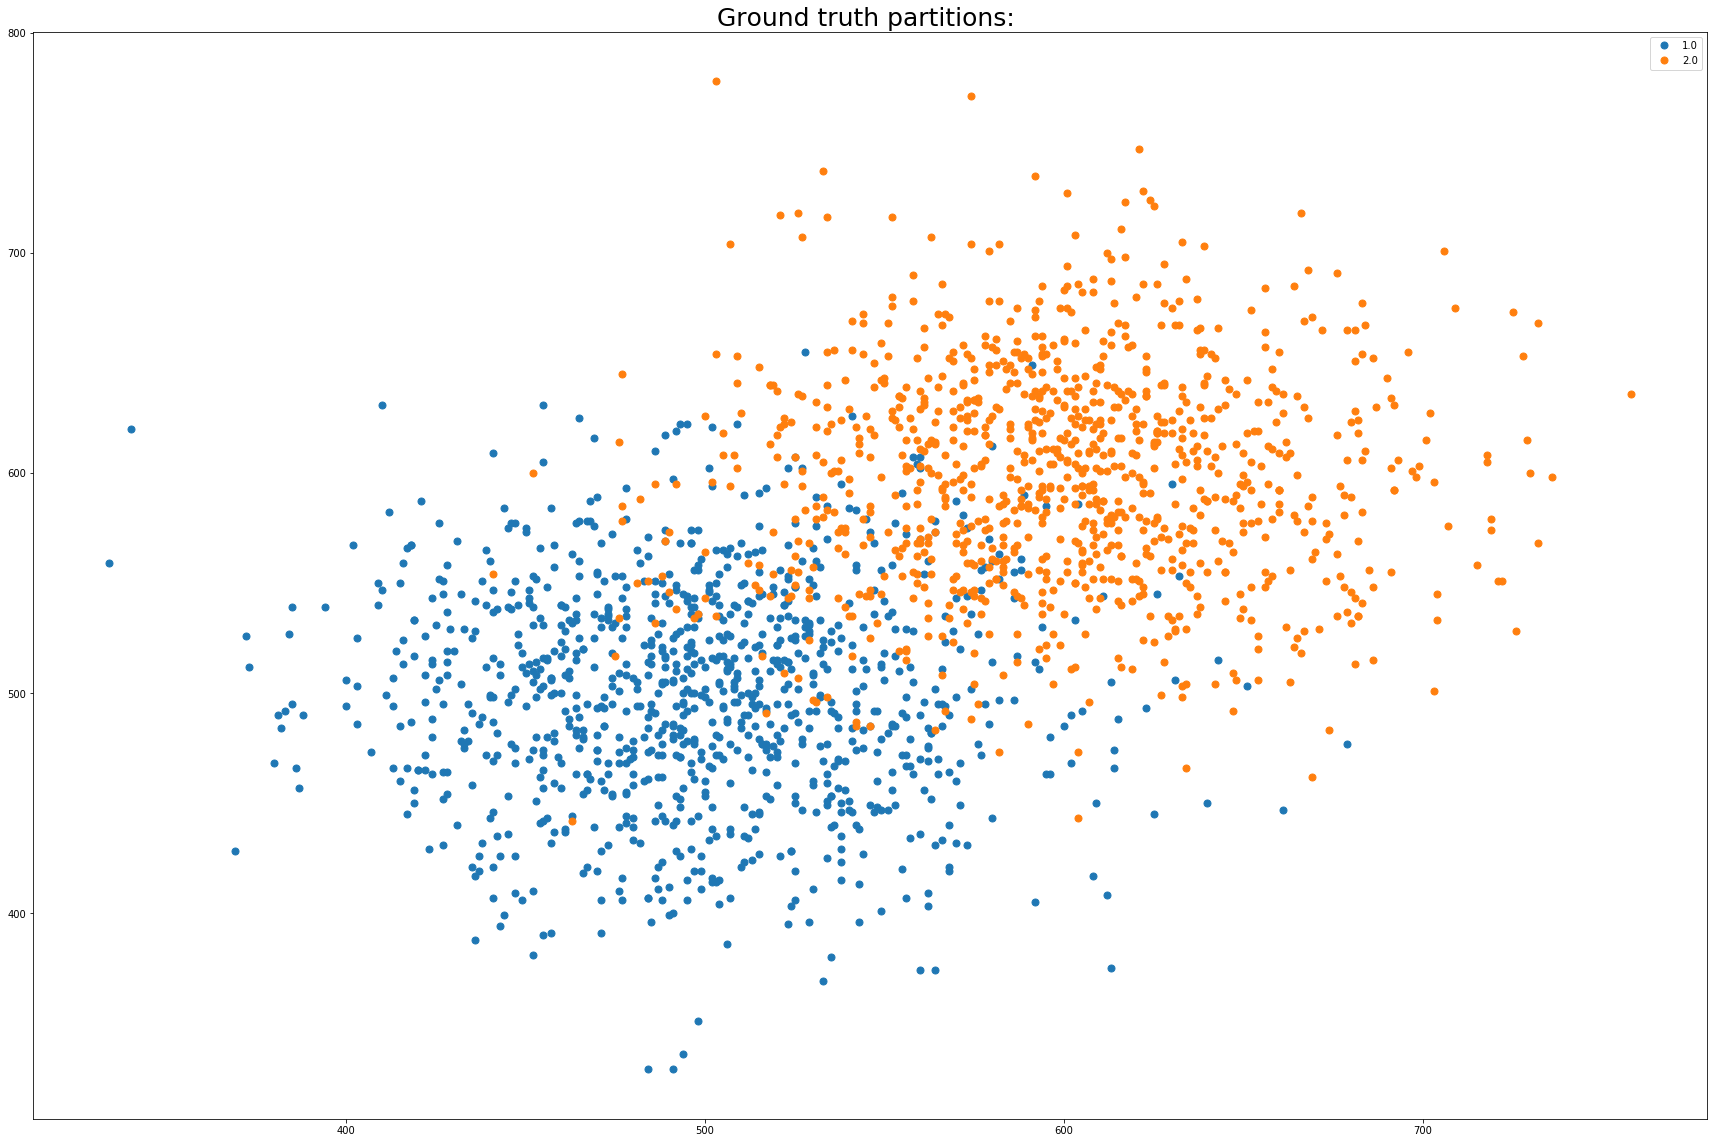

In [36]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
fig, ax = plt.subplots(1,2)
for name, group in groups:
    ax[0].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[0].legend()
ax[0].set_title('bandwidth estimated using clu.estimate_bandwidth', fontsize=25)

for name, group in groups_70:
    ax[1].plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax[1].legend()
ax[1].set_title('bandwidth=70', fontsize=25)

fig.suptitle('MeanShift algorithm for G2-20-50 dataset with different bandwidth', fontsize=36)

df_gold = pd.DataFrame(dict(x=x, y=y, label=labels))
groups_gold= df_gold.groupby('label')
fig, ax = plt.subplots()
for name, group in groups_gold:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=7, label=name)
ax.legend()
ax.set_title('Ground truth partitions: ', fontsize=25)
''
